In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
data = pd.read_csv('amazon_with_date.csv',encoding='latin1')
data = data.rename(columns={'fires': 'number'})
meses_dict = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 
            5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 
            9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}


data['month'] = data['month'].map(meses_dict)
month_group = data.groupby('month')
dicionario_mes = {nome_mes: dados for nome_mes,dados in month_group}
meses=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
# for i in range(len(meses)):
#     data.query(f'month=={i+1}')['number']=meses[i]
# display(data.head(50))
print(dicionario_mes)
print(data.query('year==2016')['number'].sum())


{'Abril':       year      state  month  number        date
3     1998       ACRE  Abril       0  1998-04-01
15    1999       ACRE  Abril       0  1999-04-01
27    2000       ACRE  Abril       1  2000-04-01
39    2001       ACRE  Abril       0  2001-04-01
51    2002       ACRE  Abril       0  2002-04-01
...    ...        ...    ...     ...         ...
6398  2013  TOCANTINS  Abril     130  2013-04-01
6410  2014  TOCANTINS  Abril     187  2014-04-01
6422  2015  TOCANTINS  Abril      88  2015-04-01
6434  2016  TOCANTINS  Abril     369  2016-04-01
6446  2017  TOCANTINS  Abril     164  2017-04-01

[540 rows x 5 columns], 'Agosto':       year      state   month  number        date
7     1998       ACRE  Agosto     130  1998-08-01
19    1999       ACRE  Agosto      63  1999-08-01
31    2000       ACRE  Agosto     136  2000-08-01
43    2001       ACRE  Agosto     396  2001-08-01
55    2002       ACRE  Agosto     728  2002-08-01
...    ...        ...     ...     ...         ...
6402  2013  TOCAN

Janeiro: 97.2
Fevereiro: 59.1
Março: 65.0
Abril: 55.5
Maio: 85.3
Junho: 210.4
Julho: 417.2
Agosto: 1466.3
Setembro: 2132.9
Outubro: 1243.8
Novembro: 622.8
Dezembro: 327.3
[97.0, 59.0, 65.0, 55.0, 85.0, 210.0, 417.0, 1466.0, 2133.0, 1244.0, 623.0, 327.0]


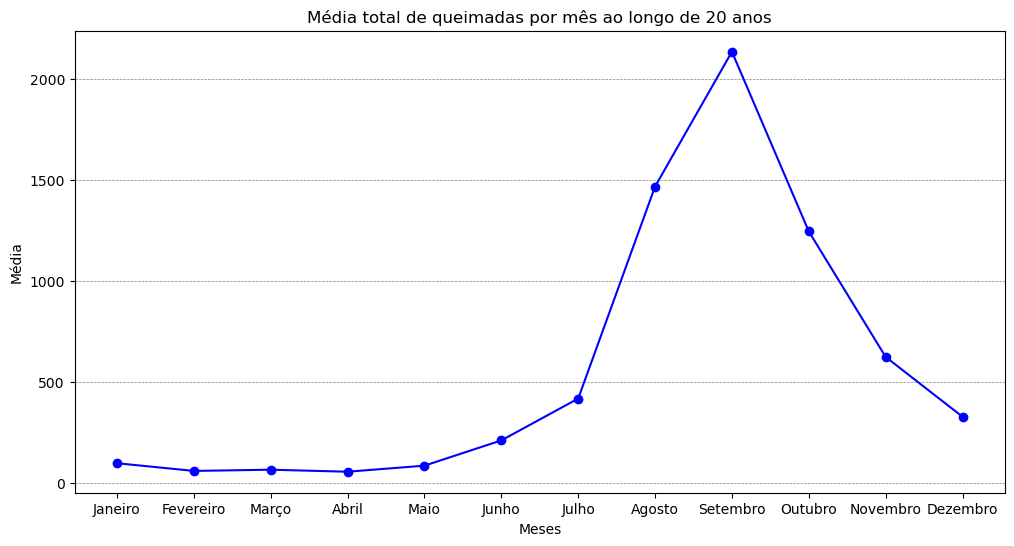

In [5]:
media_all = []

for mes in meses:
   
    media_all.append(round(dicionario_mes[mes]['number'].mean(),0))
    print(f'{mes}: {round(dicionario_mes[mes]['number'].mean(),1)}')
print(media_all)
plt.figure(figsize=(12, 6)) 
plt.plot(meses, media_all, marker='o', linestyle='-', color='b')
plt.title('Média total de queimadas por mês ao longo de 20 anos')
plt.xlabel('Meses')
plt.ylabel('Média')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()

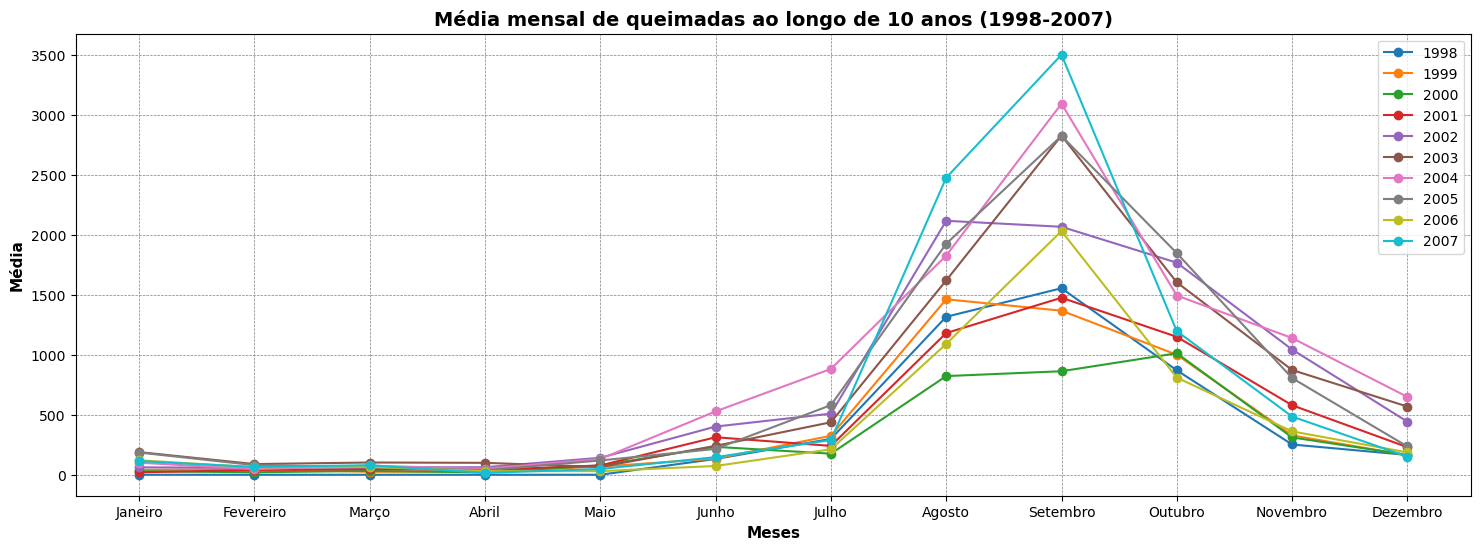

AttributeError: 'Text' object has no property 'pad'

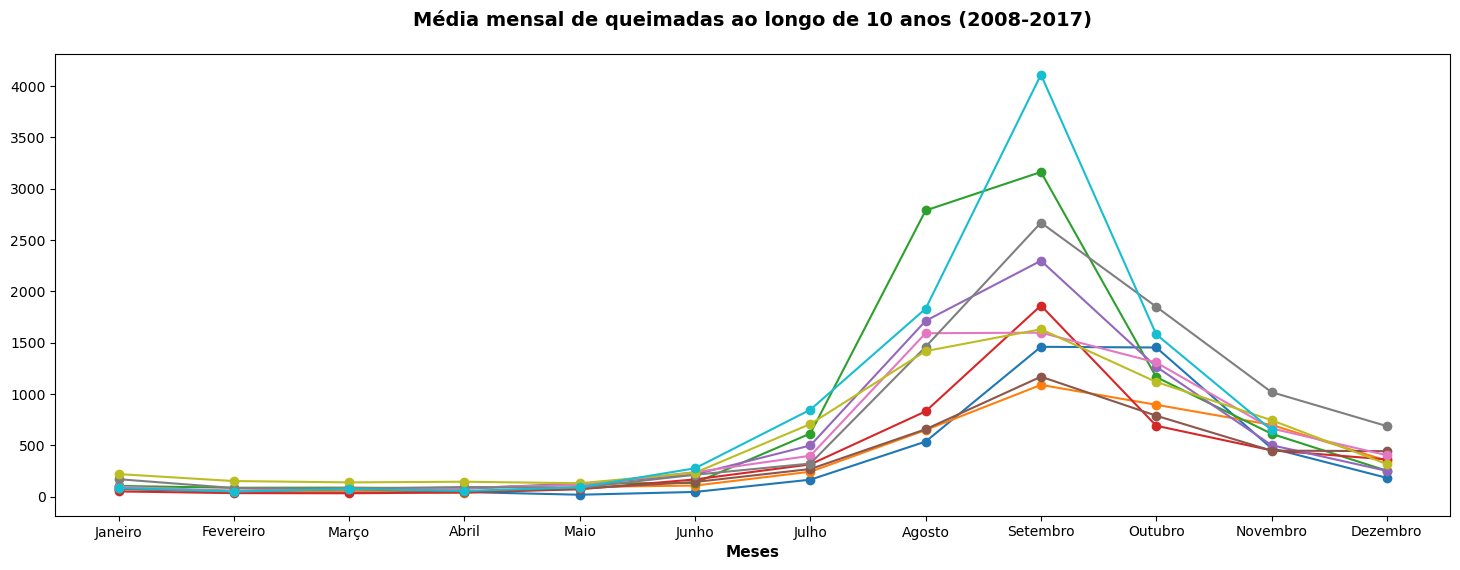

In [60]:
years_groups = data.groupby('year')
years = list(years_groups.groups.keys())
years_dicionario_media = {year: data for year,data in years_groups}

dicionario_final_media={}
for year in years:
    dicionario_final_media[year] = {}
    for mes in meses:
        # print(f"{mes}: {years_dicionario[year].query(f"month=='{mes}'")['number'].mean()}")
        dicionario_final_media[year][mes]=years_dicionario_media[year].query(f"month=='{mes}'")['number'].mean()
# print(dicionario_final_media)

plt.figure(figsize=(18, 6)) 
for i in range(int((len(list(dicionario_final_media.keys())))/2)):
    y = []
    for z in range(len(dicionario_final_media[years[i]])):
        y.append(dicionario_final_media[years[i]][meses[z]])
    plt.plot(meses,y, label=years[i],marker='o')
plt.title('Média mensal de queimadas ao longo de 10 anos (1998-2007)', fontweight="bold",fontsize=14)
plt.xlabel('Meses', fontweight="bold",fontsize=11)
plt.ylabel('Média', fontweight="bold",fontsize=11)
plt.style.use('default')

plt.grid( color='gray', linestyle='--', linewidth=0.5)
plt.legend()

plt.show()

plt.figure(figsize=(18, 6)) 
for i in range(int((len(list(dicionario_final_media.keys())))/2)):
    y = []
    for z in range(len(dicionario_final_media[years[i+10]])):
        y.append(dicionario_final_media[years[i+10]][meses[z]])
    plt.plot(meses,y, label=years[i+10],marker='o')
plt.title('Média mensal de queimadas ao longo de 10 anos (2008-2017)',fontweight="bold",fontsize=14,pad=20)
plt.xlabel('Meses', fontweight="bold",fontsize=11)
plt.ylabel('Média', fontweight="bold",fontsize=11)
# plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# plt.legend(bbox_to_anchor=(1.08, 1), loc='upper right')
plt.legend()
plt.grid( color='gray', linestyle='--', linewidth=0.5)
plt.show()
dicionario_final_media[2017]['Dezembro']=0
plt.figure(figsize=(18, 6)) 
results=[]
# print(years_dicionario_media[2016].query('month=="Janeiro"')['number'])
# print(years_dicionario_media[2016].query(f'month=="Janeiro"')['number'].sum())

for i in range(len(years)):
    results.append(years_dicionario_media[years[i]]['number'].sum())

print(results)

# for i in range(len(list(dicionario_final_media.keys()))):
#     somatorio = []
#     for z in range(len(dicionario_final_media[years[i]])):
#             somatorio.append(int(dicionario_final_media[years[i]][meses[z]]))
#             # print(round(dicionario_final_media[years[i]][meses[z]],2),)
        

#     results.append(round(sum(somatorio),0))


print(years)
plt.bar(years,results)
plt.title('Número total de queimadas por ano (1998-2017)')
plt.xlabel('Anos')
plt.ylabel('Total')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.xticks(years, rotation=45)
plt.show()



In [207]:
estate_groups = data.groupby('state')
estate_list = list(estate_groups.groups.keys())
print(estate_list)
for year in years:
    print(estate_groups.get_group)

['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao', 'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Pará', 'Pernambuco', 'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins']


In [250]:
lista =[1,2,3,5]
lista.insert(3,4)
lista

[1, 2, 3, 4, 5]